In [59]:
import matplotlib.pyplot as plt

from Framework import Confounder_Injection as CI
from Framework import Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

# Experiments

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

## SimpleConv model

In [60]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
    ]

With the test_network class it's easy to test new combinations parameters

### No confounder

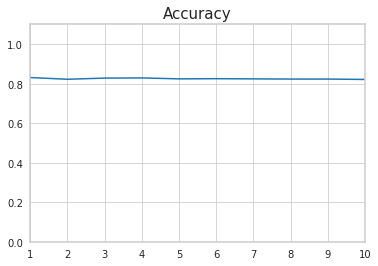

With mean accuracy= 0.8251953125


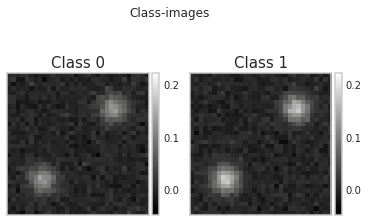

In [61]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=0, test_confounding=[0], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True, class_images=True)

### Train- and testset confounded

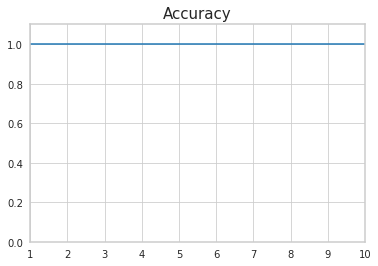

With mean accuracy= 1.0


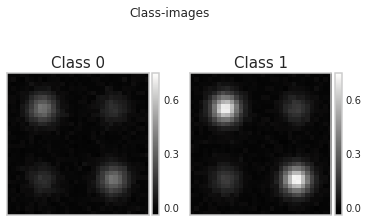

In [62]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[1], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True, class_images=True)

### Trainset confounded, testset 50% confounding

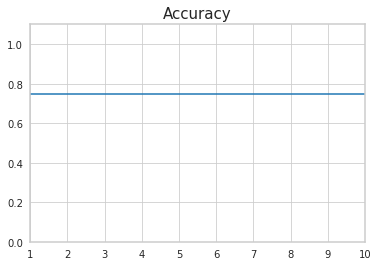

With mean accuracy= 0.75


In [63]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[0.5], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Trainset confounded, testset unconfounded

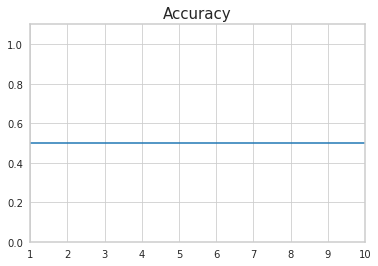

With mean accuracy= 0.5


In [64]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[0], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Accuracy vs. confounding strength in testset

For 5 epochs

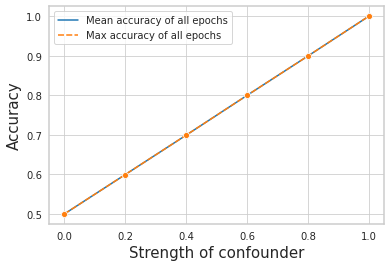

In [65]:
c = CI.confounder(debug=False)
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=5, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)

For 20 epochs

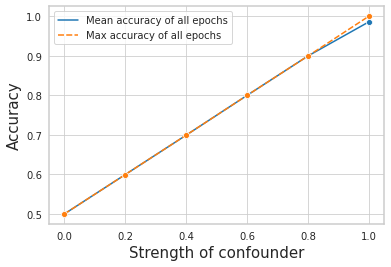

In [66]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=20, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)

## NeuralNetwork model

### Accuracy vs. confounding strength in testset

For 5 epochs

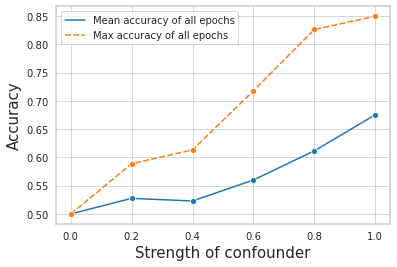

In [67]:
c = CI.confounder()
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=5, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)

For 20 epochs

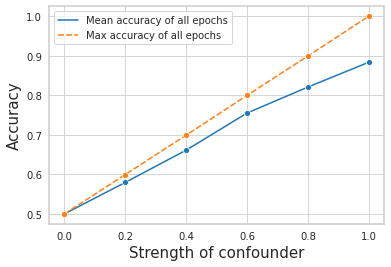

In [68]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=20, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)